In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D
import os

In [ ]:
# To use GPU for Google Colab
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [2]:
import os
os.getcwd()

'C:\\Users\\mdsou'

In [5]:
os.chdir(r'C:\Users\mdsou\OneDrive - University of South Florida\USF MS BAIS\Electronic Nose\ENose')

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1/255)
num_classes = 3

In [7]:
# Set the dataset directories
train_dir = 'train/'
val_dir = 'val/'
test_dir = 'test/'

In [8]:
#Define image sizes and number of classes
img_width=32
img_height=32
num_classes=3
batch_size=32

In [10]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical")
"""DirectoryIterator(
    directory="Enose/train",
    image_data_generator = train_datagen,
    target_size=(32, 32),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42,
)"""

Found 714 images belonging to 3 classes.


'DirectoryIterator(\n    directory="Enose/train",\n    image_data_generator = train_datagen,\n    target_size=(32, 32),\n    color_mode="grayscale",\n    batch_size=batch_size,\n    class_mode="categorical",\n    shuffle=True,\n    seed=42,\n)'

In [12]:
valid_data = valid_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical")
"""DirectoryIterator(
    directory="Enose/val",
    image_data_generator = valid_datagen,
    target_size=(32, 32),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42)"""

Found 60 images belonging to 3 classes.


'DirectoryIterator(\n    directory="Enose/val",\n    image_data_generator = valid_datagen,\n    target_size=(32, 32),\n    color_mode="grayscale",\n    batch_size=batch_size,\n    class_mode="categorical",\n    shuffle=True,\n    seed=42)'

In [10]:
# Define the number of time steps and sensor channels
time_steps = 60
num_sensors = 17

In [12]:
# Define the input shape
input_shape = (time_steps, num_sensors)
img_width=32
img_height=32

In [56]:
# Create a Sequential model
model = Sequential()

# Add a 2D convolutional layer with 32 filters, a kernel size of 3, and ReLU activation
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))

# Add a max pooling layer with a pool size of 2
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(rate=0.25))

# Add a flatten layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))

# Add a dense layer with number of classes and softmax activation
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 conv2d_17 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        36928     
                                                     

In [66]:
# Compile the model with appropriate loss function and optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
#Trying Adamax for time variant
"""opt = tf.keras.optimizers.experimental.Adamax(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    #weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adamax')"""

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [29]:
# Data augmentation techniques to prevent overfitting
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)

In [83]:
# Train the model on the training data with data augmentation
#history = model.fit(datagen.flow(train_data),
#Takes too long and too much memory to train
history = model.fit(train_data,
          #steps_per_epoch=len(train_data) / batch_size,
          epochs=25,
          validation_data=valid_data, verbose=2)

Epoch 1/25
23/23 - 2s - loss: 0.0549 - accuracy: 0.9790 - val_loss: 0.1748 - val_accuracy: 0.9000 - 2s/epoch - 80ms/step
Epoch 2/25
23/23 - 2s - loss: 0.0601 - accuracy: 0.9804 - val_loss: 0.6218 - val_accuracy: 0.8333 - 2s/epoch - 72ms/step
Epoch 3/25
23/23 - 2s - loss: 0.0776 - accuracy: 0.9734 - val_loss: 1.0579 - val_accuracy: 0.7000 - 2s/epoch - 69ms/step
Epoch 4/25
23/23 - 2s - loss: 0.0340 - accuracy: 0.9888 - val_loss: 0.1551 - val_accuracy: 0.9167 - 2s/epoch - 68ms/step
Epoch 5/25
23/23 - 2s - loss: 0.0987 - accuracy: 0.9650 - val_loss: 0.1377 - val_accuracy: 0.9167 - 2s/epoch - 67ms/step
Epoch 6/25
23/23 - 2s - loss: 0.0797 - accuracy: 0.9692 - val_loss: 0.4241 - val_accuracy: 0.8500 - 2s/epoch - 68ms/step
Epoch 7/25
23/23 - 2s - loss: 0.0784 - accuracy: 0.9734 - val_loss: 0.2797 - val_accuracy: 0.9000 - 2s/epoch - 74ms/step
Epoch 8/25
23/23 - 2s - loss: 0.0514 - accuracy: 0.9804 - val_loss: 0.4561 - val_accuracy: 0.8667 - 2s/epoch - 75ms/step
Epoch 9/25
23/23 - 2s - loss: 0.

In [72]:
history = model.fit_generator(
    train_data,
    #steps_per_epoch=nb_train_samples // batch_size,
    epochs=15,
    validation_data=valid_data,
    #validation_steps=nb_validation_samples // batch_size
)

Epoch 1/15
 1/23 [>.............................] - ETA: 2s - loss: 0.0753 - accuracy: 0.9688

C:\Users\mdsou\AppData\Local\Temp\ipykernel_15120\1812815383.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


23/23 [==============================] - 2s 86ms/step - loss: 0.1187 - accuracy: 0.9636 - val_loss: 0.7578 - val_accuracy: 0.7667
Epoch 2/15
23/23 [==============================] - 2s 81ms/step - loss: 0.0988 - accuracy: 0.9664 - val_loss: 0.9390 - val_accuracy: 0.7667
Epoch 3/15
23/23 [==============================] - 2s 82ms/step - loss: 0.0963 - accuracy: 0.9566 - val_loss: 0.9762 - val_accuracy: 0.6000
Epoch 4/15
23/23 [==============================] - 2s 84ms/step - loss: 0.1571 - accuracy: 0.9482 - val_loss: 0.4541 - val_accuracy: 0.8000
Epoch 5/15
23/23 [==============================] - 2s 80ms/step - loss: 0.0977 - accuracy: 0.9678 - val_loss: 0.5420 - val_accuracy: 0.8000
Epoch 6/15
23/23 [==============================] - 2s 91ms/step - loss: 0.0671 - accuracy: 0.9818 - val_loss: 0.2314 - val_accuracy: 0.9000
Epoch 7/15
23/23 [==============================] - 2s 94ms/step - loss: 0.0622 - accuracy: 0.9776 - val_loss: 0.7697 - val_accuracy: 0.7667
Epoch 8/15
23/23 [======

In [43]:
model.save_weights('model_saved.h5')

In [44]:
# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

NameError: name 'x_test' is not defined

# Create new set for prediction

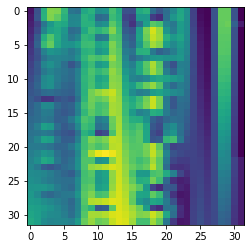

In [75]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from matplotlib import pyplot as plt

#Test
img = load_img("./val/Ethanol/image_Ethanol 200ppm62.png",
               color_mode='grayscale',
               target_size=(32,32)
              )


plt.imshow(img)

In [78]:
#Convert the image to array
single_image = img_to_array(img)

#Also divide the image values by 255 to normalize
img_rank4 = np.expand_dims(single_image/255, axis=0)

model.predict(img_rank4)

1/1 [==============================] - 0s 477ms/step


array([[9.9821609e-01, 7.7757970e-05, 1.7062315e-03]], dtype=float32)

In [79]:
np.round(model.predict(img_rank4),2)

1/1 [==============================] - 0s 21ms/step


array([[1., 0., 0.]], dtype=float32)

In [80]:
# We can predict the class directly using the following function:

np.argmax(model.predict(img_rank4), axis=-1)

1/1 [==============================] - 0s 20ms/step


array([0], dtype=int64)

In [81]:
# Retrieve the class labels from the train_generator:

label_map = (train_data.class_indices)

label_map

{'Ethanol': 0, 'Isopropanol': 1, 'Methanol': 2}

In [82]:
list(label_map.keys())[np.argmax(model.predict(img_rank4), axis=-1)[0]]

1/1 [==============================] - 0s 22ms/step


'Ethanol'

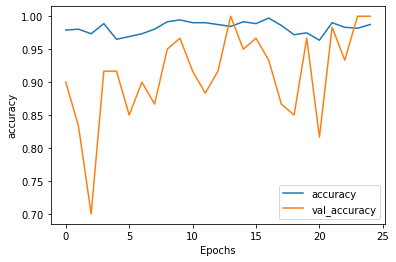

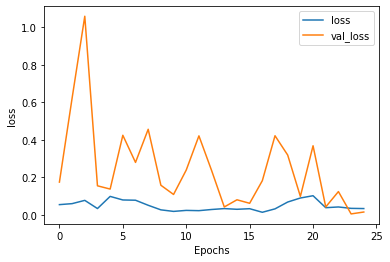

In [84]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.legend([string, 'val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
# Make predictions on new gas signatures
predictions = model.predict(new_gas_signatures)